In [15]:
## Prashant Neel July 2022
# produce plots of geopotential height and meridional wind streamlines for specific days in the EC-Earth3 model output 
#(based on days exceeding a heatwave threshold)
# PNW region

###INPUTS
scenario = 'ssp126'
#ssp126 or ssp245

#Lat long boundaries
#Specify min and max values of latitude and longitude 
lat_min = 30
lat_max =70
lon_min = -145
lon_max = -70

#step between each gridline
step = 5
#gridlines
xlist = [*range(lon_min,lon_max+step,step)]
ylist = [*range(lat_min,lat_max+step,step)]

#500 hPa
pressure_level = 500


#Cities to Plot
def plot_cities(ax):
    lats = [45.523064, 47.6062, 49.2827]
    lons = [-122.676483, -122.3321, -123.1207]
    cities = ['Portland', 'Seattle', 'Vancouver']
    for lon, lat, city in zip(lons, lats, cities):
        ax.plot(lon, lat, 'wo', zorder=5, MarkerSize=1, transform=ccrs.PlateCarree())
        ax.text(lon + 0.1, lat, city, fontsize='medium',color='white',fontweight='bold',
                transform=ccrs.PlateCarree())

In [16]:
#either use aa pre-defined list of dates and members, or use a spreadsheet loaded below

#date_string_list = ['2094-07-18','2094-07-28','2032-07-24','2044-07-23','2079-07-24','2079-07-23','2068-07-29','2099-07-11','2024-07-24','2061-07-31','2082-07-18']
#member_list = ['r110i1p1f1','r111i1p1f1','r101i1p1f1','r106i1p1f1','r109i1p1f1','r102i1p1f1','r102i1p1f1','r102i1p1f1','r103i1p1f1','r102i1p1f1','r110i1p1f1']

In [17]:
##IMPORT PACKAGES

import cartopy.feature as cfeature ## for lakes/borders et
countries_50m = cfeature.NaturalEarthFeature('cultural','admin_0_countries','50m',edgecolor='k',facecolor='none')
import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset  
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry.polygon import LinearRing
import datetime as dt
from matplotlib import gridspec
import glob
from scipy.stats import norm
import matplotlib.colors as clrs
import pandas as pd

crs = ccrs.PlateCarree()

##define constants
p0 = 1000   #base pressure level
rcp = 0.286 #gas constant divided by specific heat capacity
R_gas= 8.31 #ideal gas constant
G = 9.81 #gravity

#make function to convert all floats to integers in a matrix
def f1(x):
    return np.int(x)
f2 = np.vectorize(f1)

In [18]:
#use generated top 10 ensemble members
PNW_126 = pd.read_excel('PNW126_all_head.xlsx', index_col=0)

date_string_list = (PNW_126['dates'].dt.strftime('%Y-%m-%d')).tolist()
member_list = PNW_126['member'].tolist()
Max_Temp = PNW_126['Max_Temp'].tolist()
r = PNW_126['p_corr'].tolist()

#list for alphabet labels
alpha = ['a) ', 'b) ','c) ','d) ','e) ','f) ','g) ','h) ','i) ','j) ']

In [19]:
#make boundary for ALbers Equal Area Projection

import matplotlib.path as mpath

def make_boundary_path_sector_map(lons,lats):
    """
    Created on Thurs Feb 11 14:34 2021

    @author: Christine McKenna

    ===========================================================
    Purpose: Function to make a path around boundary to create
             a sector map
    ===========================================================
    """
    boundary_path = np.array([lons[-1,:],lats[-1,:]])
    boundary_path = np.append(boundary_path,np.array([lons[::-1,-1],\
                              lats[::-1,-1]]),axis=1)
    boundary_path = np.append(boundary_path,np.array([lons[1,::-1],\
                              lats[0,::-1]]),axis=1)
    boundary_path = np.append(boundary_path,np.array([lons[:,0],\
                              lats[:,0]]),axis=1)
    boundary_path = mpath.Path(np.swapaxes(boundary_path, 0, 1))

    return boundary_path

# Change to be the boundary you want
lats_bound = np.linspace(31,69,40) 
lons_bound = np.linspace(-144,-71,76)
[llo_bnd,lla_bnd] = np.meshgrid(lons_bound,lats_bound)
boundary_path = make_boundary_path_sector_map(llo_bnd,lla_bnd)



In [20]:
#define functions
        
def suffix(d):
    return 'th' if 11<=d<=13 else {1:'st',2:'nd',3:'rd'}.get(d%10, 'th')

def custom_strftime(format, t):
    return t.strftime(format).replace('{S}', str(t.day) + suffix(t.day))

In [21]:
#read files
path = '/nfs/annie/earamay/Prash/'+scenario+'/'

#zfile = glob.glob(path + "Z/zg_day_EC-Earth3_historical_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")
#ufile = glob.glob(path + "wind/ua_day_EC-Earth3_historical_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")
#vfile = glob.glob(path + "wind/va_day_EC-Earth3_historical_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")

#print(np.shape(vfile))
#print(np.shape(ufile))
#print(np.shape(zfile))
#print("ENSURE ALL LISTS HAVE LENGTH = 1")

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


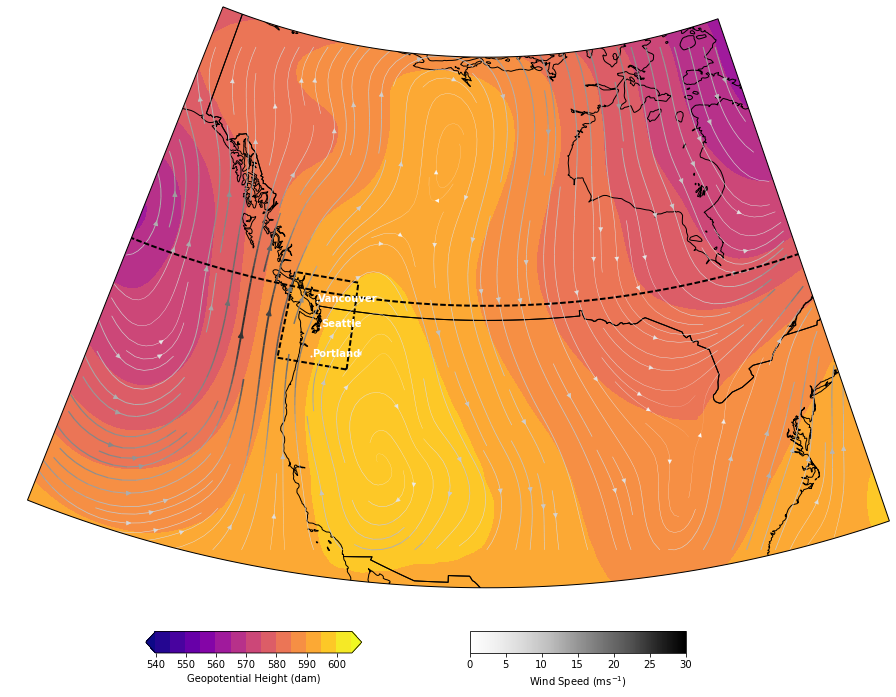

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


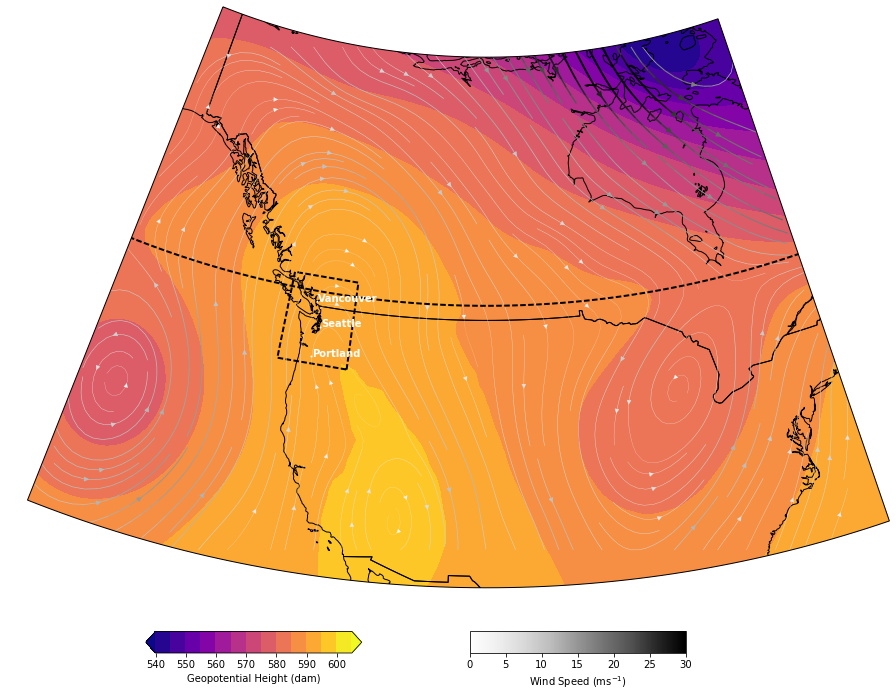

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


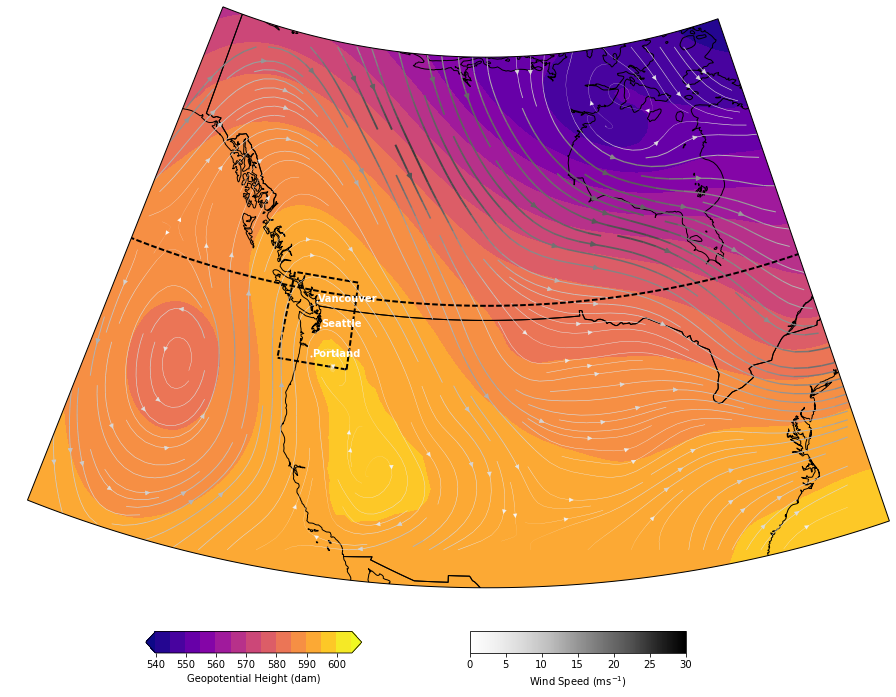

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


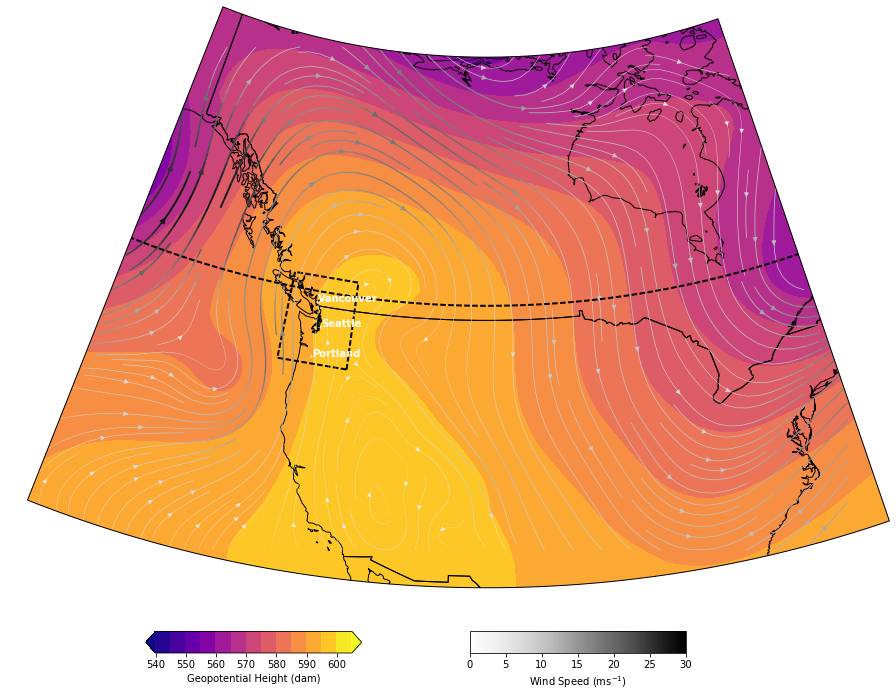

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


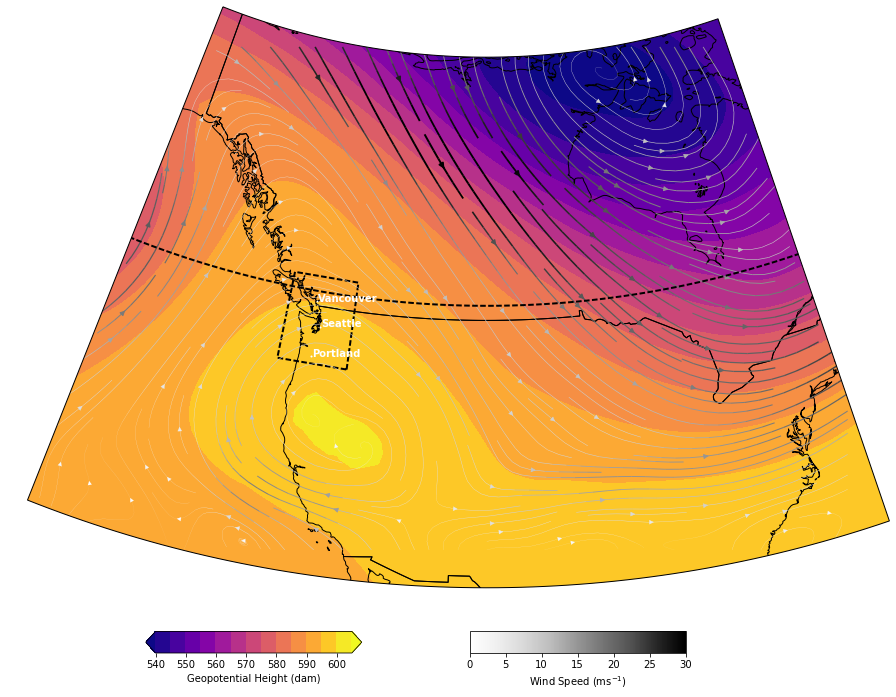

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


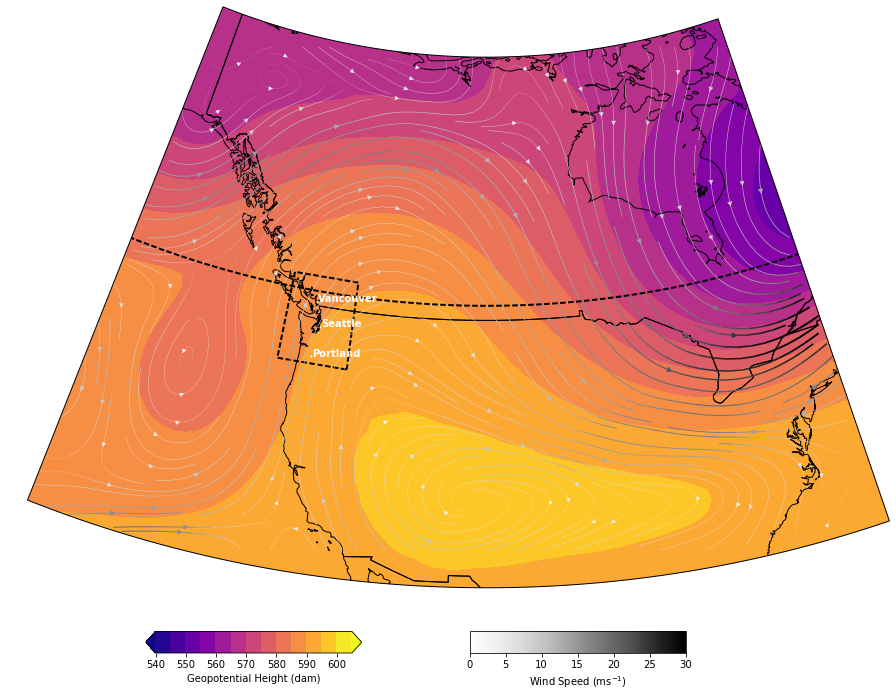

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


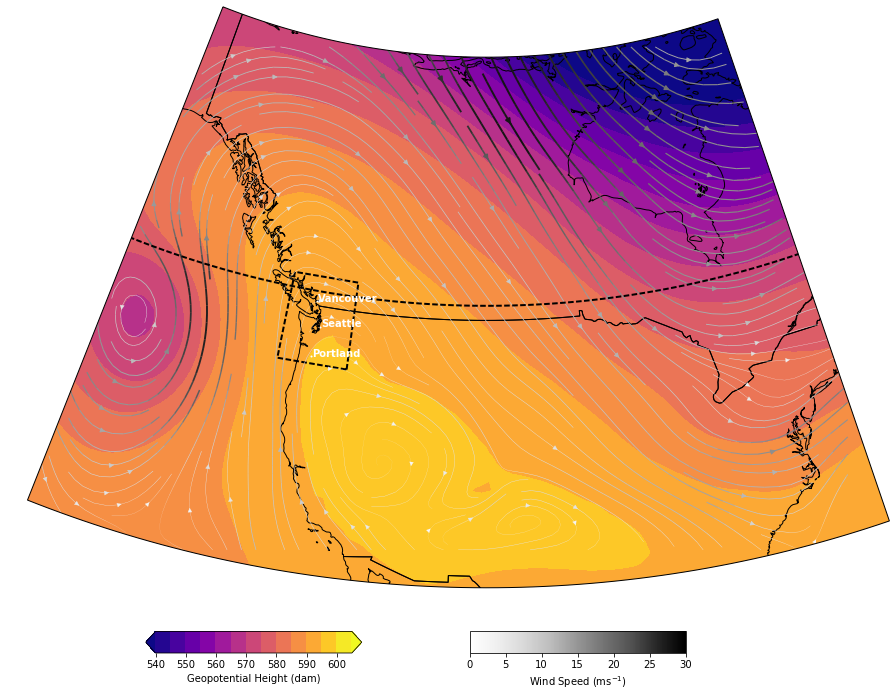

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


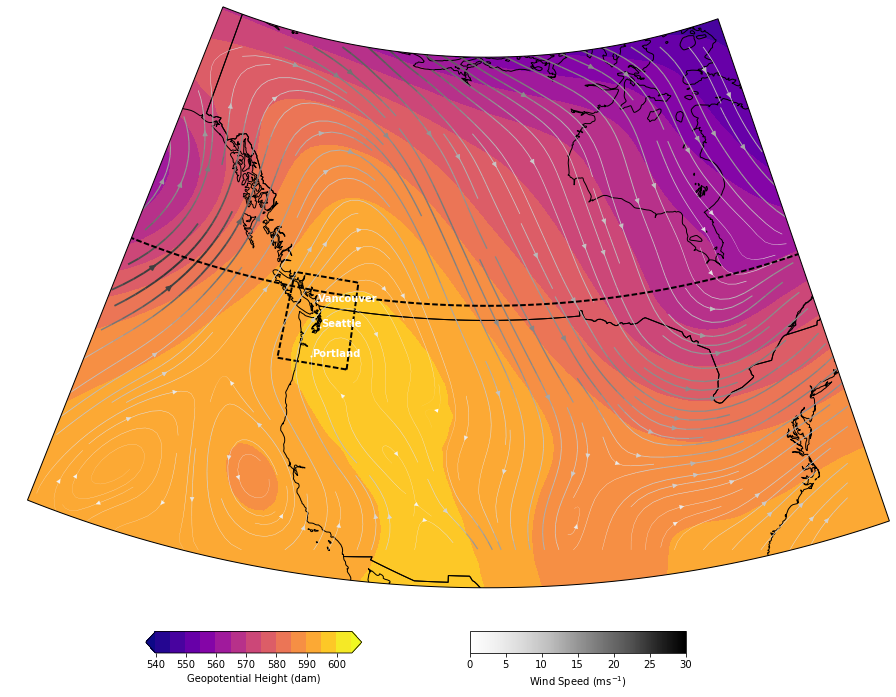

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


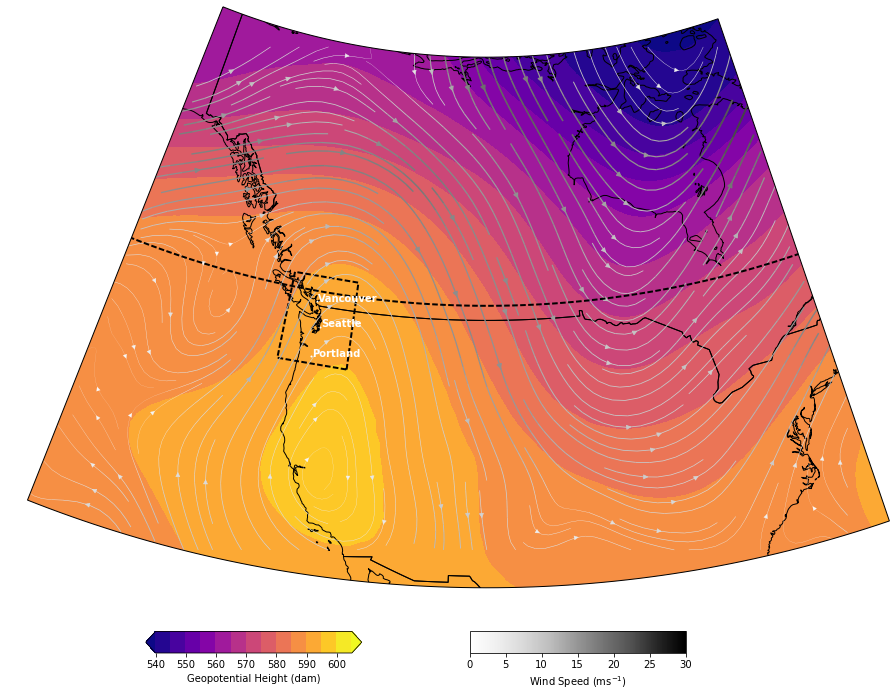

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


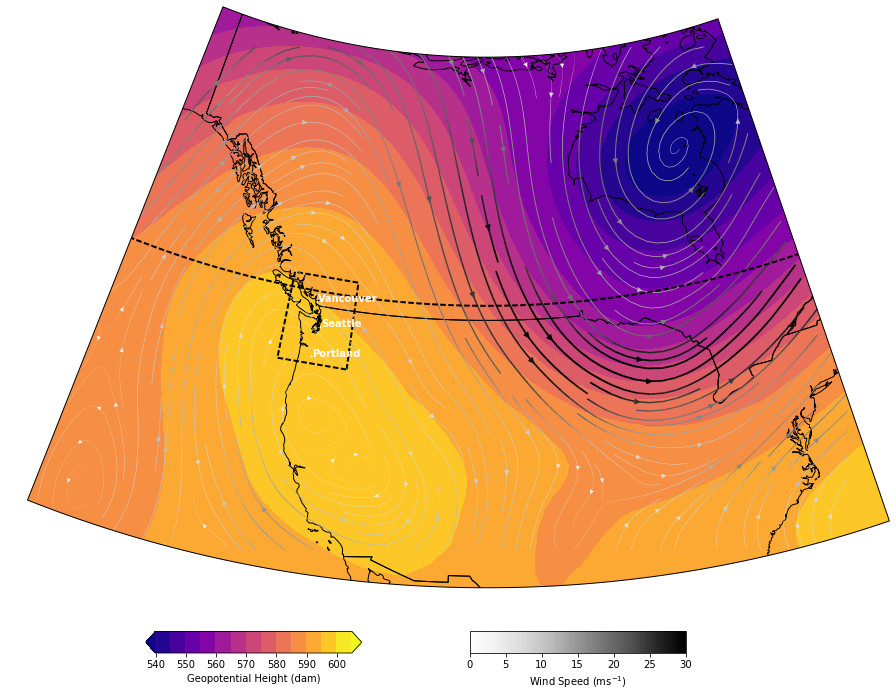

Complete!


In [35]:
#loop through days and members to produce plots (each plot saved seperately)
count = 0
for date_string in date_string_list:
    date_text = custom_strftime('{S} %B %Y', dt.datetime.strptime(date_string, '%Y-%m-%d'))
    year = date_string[0:4]
    mon = date_string[5:7]
    mainday = int(date_string[8:10])

    datetime_object= dt.datetime.strptime(mon, "%m")
    month = datetime_object.strftime("%B")
    days = [mainday]
    
    #savefile
    pathout ="/nfs/see-fs-01_teaching/ee21pnm/Project/output/PNW_"+scenario
    
    #specify member
    membername = member_list[count]
        
        
    ##Read in geopotential data
    
    zfile = glob.glob(path + "Z/zg_day_EC-Earth3_"+scenario+"_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")
    ufile = glob.glob(path + "wind/ua_day_EC-Earth3_"+scenario+"_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")
    vfile = glob.glob(path + "wind/va_day_EC-Earth3_"+scenario+"_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")

    nc = Dataset(zfile[0],"r")

    #information on the file's variables
    #print(nc.variables.keys())
    #for var in ['time', 'plev', 'lat', 'lon', 'z']:
    #    print(var,nc.variables[var])


    lat = nc.variables['lat'][:]  
    lon_360 = nc.variables['lon'][:]
    z = nc.variables['zg'][:]
    time = nc.variables['time'][:]
    p_pa = nc.variables['plev'][:]

    #convert from pascals to Hpa
    p1 = p_pa/100
    p2 = p1.astype(int)

    #reorder ascending pressure levels
    p_indcs = np.argsort(p2)
    p = p2[p_indcs]

    #adjust z for new pressure order
    z = z[:,p_indcs,:,:]

    widths = np.linspace(0, 1, lat.size)

    # Convert all the times in the file to datetime objects
    #1850 not 1900
    dt_time = [dt.date(1850, 1, 1) + dt.timedelta(days=int(t)) for t in time]

    #convert to array
    dt_time2 = np.array(dt_time)

    #convert 0 to 360 to -180 to 180
    lon = (lon_360 + 180) % 360 - 180
    indcs = np.argsort(lon)

    lon = lon[indcs]

    #adjust longitude order for z
    z = z[:,:,:,indcs]


    ##Read in u data

    ncU = Dataset(ufile[0],"r")


    #information on the file's variables
    #print(ncW.variables.keys())
    #for var in ['w']:
        #print(var,ncW.variables[var])

    u = ncU.variables['ua'][:]
    timeU = ncU.variables['time'][:]

    #adjust u for new pressure order
    u = u[:,p_indcs,:,:]

    #adjust longitude order
    u = u[:,:,:,indcs]


    # Convert all the times in the file to datetime objects
    dt_timeU = [dt.date(1850, 1, 1) + dt.timedelta(days=int(t)) for t in timeU]
    #convert to array
    dt_timeU2 = np.array(dt_timeU)


    #repeat for V

    ncV = Dataset(vfile[0],"r")


    #information on the file's variables
    #print(ncV.variables.keys())
    #for var in ['w']:
        #print(var,ncW.variables[var])

    v = ncV.variables['va'][:]
    timeV = ncV.variables['time'][:]

    #adjust longitude order
    v = v[:,:,:,indcs]



    # Convert all the times in the file to datetime objects
    dt_timeV = [dt.date(1850, 1, 1) + dt.timedelta(days=int(t)) for t in timeV]
    #convert to array
    dt_timeV2 = np.array(dt_timeV)
    #AEA Aerial plot

    plt.rcParams.update({'figure.max_open_warning': 0})
    for day in days:

        #slice the data

        p_lev = pressure_level # this indicates hPa level
        p_level = str(p_lev) # this is used to label the figures which are saved at the end
        pressure = np.where(p==p_lev)

        #find index for temp

        date_index_array = np.where(dt_time2==dt.date(int(year),int(mon),day)) #2589
        date_index = np.squeeze(date_index_array)

        #repeat for u,v,w
        date_index_arrayU = np.where(dt_timeU2==dt.date(int(year),int(mon),day))
        date_indexU = np.squeeze(date_index_arrayU)
        date_index_arrayV = np.where(dt_timeV2==dt.date(int(year),int(mon),day))
        date_indexV = np.squeeze(date_index_arrayV)

        z_slice = np.squeeze(z[date_index,pressure,:,:])
        u_slice = np.squeeze(u[date_indexU,pressure,:,:])
        v_slice = np.squeeze(v[date_indexV,pressure,:,:])

        #convert to geopotential height
        #z_height = (z_slice/G)/10
        z_height = z_slice/10

        # Find where in the longitude array the values are between lon_min and lon_max 
        lons = np.where((lon >= lon_min) & (lon <= lon_max))[0]

        # Gives an array which is the subdomain of the longitude values 
        lon_subset = lon[lons]

        #Find the values in the longitude array at which this subsection range of longitudes lies between
        lon_min_index = np.min(lons)  
        lon_max_index = np.max(lons) + 1
        #print lon_subset, 'lon_subset'
        #Repeat for latitude
        lats = np.where((lat >= lat_min) & (lat <= lat_max))[0]
        lat_subset = lat[lats]
        lat_min_index =np.min(lats) 
        lat_max_index = np.max(lats) +1
        #print lat_subset ,'lat_subset'

        # Initiate new Figure
        fig1 = plt.figure(figsize=(15,10))
        #gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1]) 


        #ax1 = fig1.add_subplot(gs[0],projection=ccrs.AlbersEqualArea(90,65))
        ax1 = fig1.add_subplot(1,1,1,projection=ccrs.AlbersEqualArea(-105,50))

        #legend
        #lx = fig1.add_subplot(gs[1])

        #albers equal area
        #ax1 = fig1.add_subplot(1,1,1,projection=ccrs.AlbersEqualArea(np.mean((lon_min,lon_max))))
        #ax1.set_boundary(boundary_path,transform=ccrs.PlateCarree())
        #ax1.set_extent((lon_min,lon_max,lat_min,lat_max-step))
        ax1.set_extent((lon_min,lon_max-step,lat_min,lat_max-step))
        ax1.set_boundary(boundary_path,transform=ccrs.PlateCarree())

        clevels = [540,545,550,555,560,565,570,575,580,585,590,595,600,605]


        im1 = ax1.contourf(lon_subset, lat_subset, z_height[lat_min_index:lat_max_index, lon_min_index:lon_max_index],
    levels=clevels, transform=ccrs.PlateCarree(),cmap='plasma',extend='both')

        #plot major cities
        plot_cities(ax1)

        #add gridlines
        ax1.add_feature(countries_50m, linewidth=1)
        #gl = ax1.gridlines(color="black", linestyle="dotted",draw_labels='True') #,draw_labels='True')
        #gl.xlabels_top = False
        #gl.ylabels_left = False
        #gl.xlines = True
        #gl.ylines = True
        #gl.xlocator = mticker.FixedLocator((xlist))
        #gl.ylocator = mticker.FixedLocator((ylist))
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER

        #add latitude cross section line
        #im3 = ax1.plot(np.linspace(-170, -70, 200),[50] * 200,linewidth=2, transform=ccrs.Geodetic(), color='k',linestyle='dashed')

        #generate wind speed magnitudes from u and v
        wspeed_all = np.sqrt((u_slice**2)+(v_slice**2))
        wspeed = wspeed_all[lat_min_index:lat_max_index, lon_min_index:lon_max_index]
        #lw = 2*wspeed / wspeed.max()
        lw = speedToLW(wspeed, wspeed.max())


            #plot stream plot
        strm = ax1.streamplot(lon_subset, lat_subset, u_slice[lat_min_index:lat_max_index, lon_min_index:lon_max_index], 
    v_slice[lat_min_index:lat_max_index, lon_min_index:lon_max_index], transform=crs, linewidth=lw, color=wspeed, cmap='Greys',
    density = 2, norm = clrs.Normalize(vmin=0,vmax=30),
    arrowsize=1, arrowstyle='-|>', minlength=0.1,zorder=None, start_points=None )


        #add box/square
        sq_lons = [-119, -119, -126, -126]
        sq_lats = [45, 51, 51, 45]
        #Specify min and max values of latitude and longitude 
        ring = LinearRing(list(zip(sq_lons, sq_lats)))
        ax1.add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=2,linestyle='dashed')

        #colorbar
        #axes are left, bottom, width, height
        cax = fig1.add_axes([0.25, 0.01, 0.2, 0.03])
        cbar = fig1.colorbar(im1, cax=cax, orientation='horizontal')
        cbar.set_label('Geopotential Height (dam)')

        cax2 = fig1.add_axes([0.55, 0.01, 0.2, 0.03])
        stream_cbar = fig1.colorbar(strm.lines, ax=ax1,cax=cax2,orientation='horizontal')
        stream_cbar.set_label('Wind Speed (ms$^{-1}$)')
        #cbar.outline.set_linewidth(0.5)
        #cbar.ax.tick_params(labelsize=10)
        #cbar.set_label('Geopotential Height (dam)',fontsize=10)
        #fig1.subplots(sharex=True, sharey=True)
        #fig1.subplots_adjust(wspace=0.1, hspace=0.1)
        #fig1.tight_layout()
        #fig1.savefig(pathout+'/ERA_interim_Geopotential_Height.png',format ='png', dpi=150, bbox_inches='tight')

        #make linewidth legend
        #makeStreamLegend(strm, lx, LWToSpeed,wspeed.max(), nlines=3, fmt='{:6.3f}')



        #Save and show the figure
        #ax1.set_title(membername + ' ' + str(day)+'.'+str(mon)+'.'+str(year)+' '+str(p_level)+'hPa Geopotential Height and Wind Vectors',fontsize=15)
        plt.savefig(pathout+'/'+membername + '_'+str(mon)+'.'+str(day)+'.'+str(year)+'_'+str(p_level)+'hPa_Geopotential_Height_uv_stream.png',format ='png', dpi=150, bbox_inches='tight')
        count = count + 1
        plt.show()
print('Complete!')

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/apps/developers/com

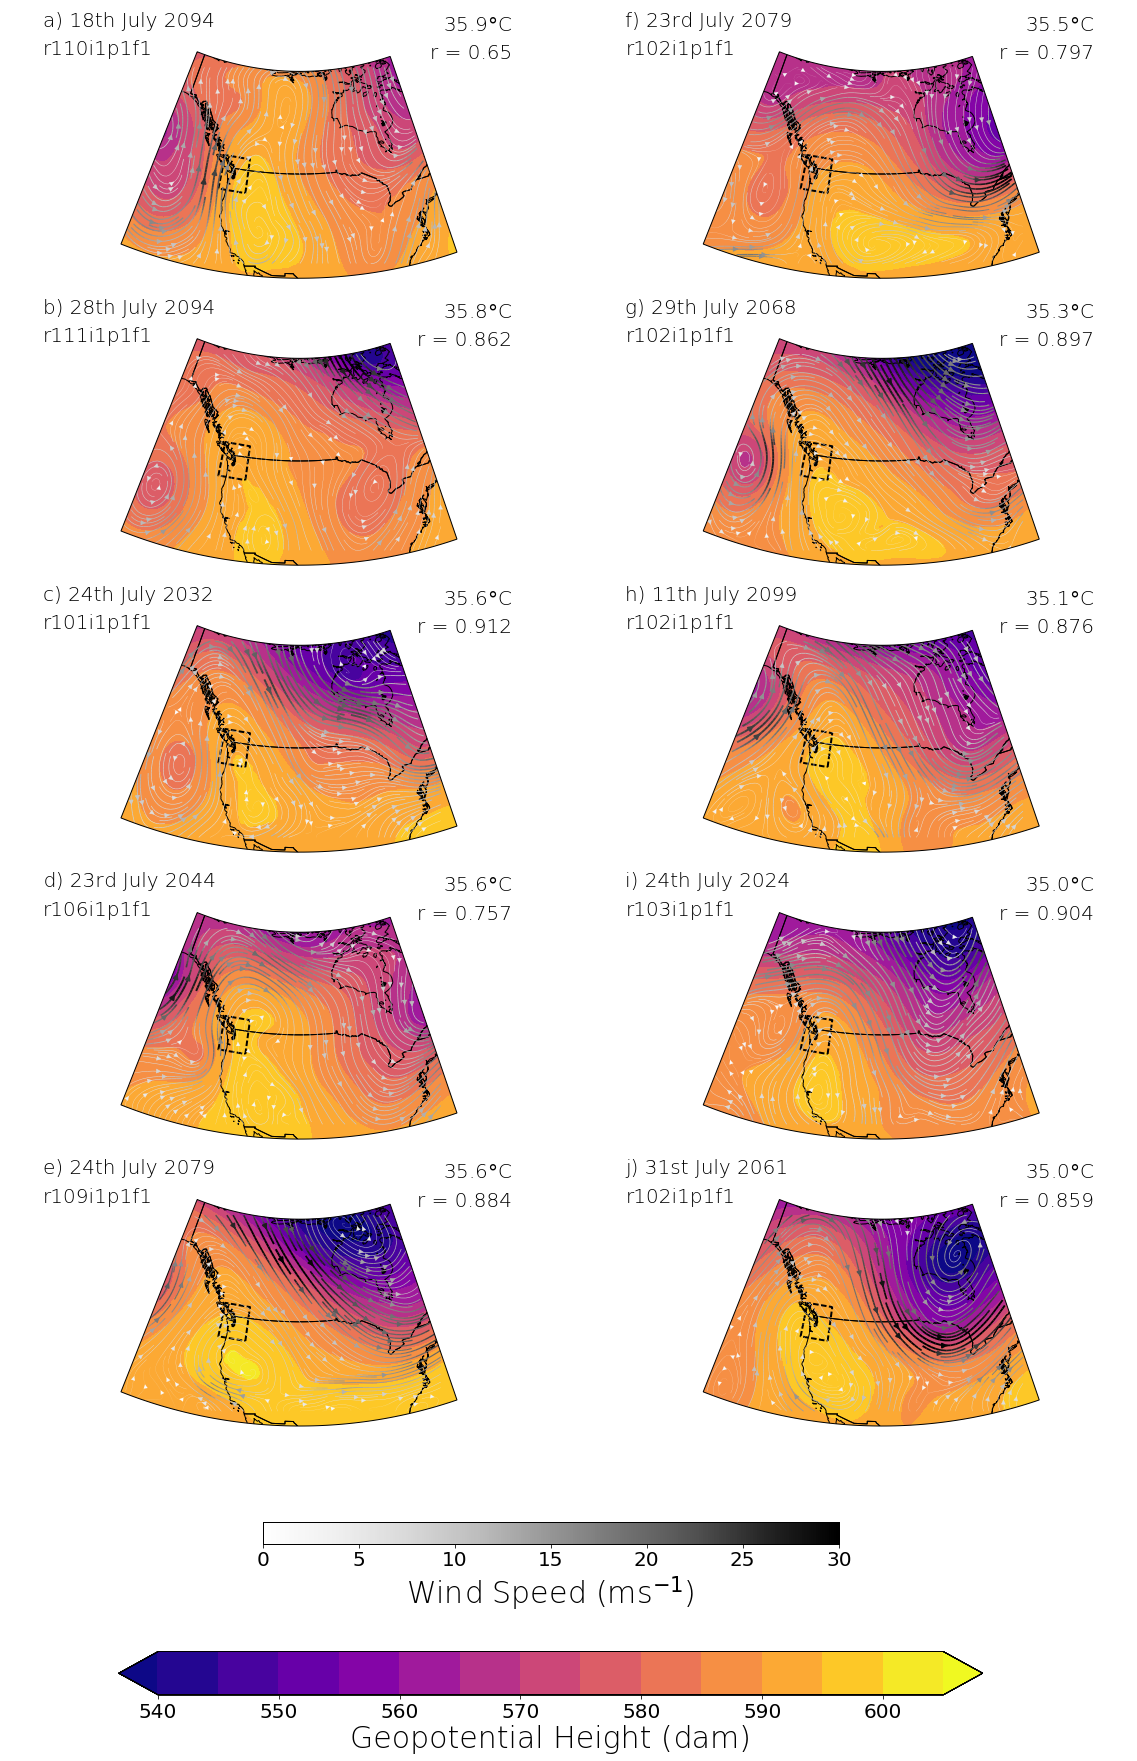

In [29]:
#loop through days and members to produce plots (grid form)

fig1 = plt.figure(figsize=(20,30))
gs = gridspec.GridSpec(57,4)
fig1.patch.set_facecolor('w')


count = 0
for date_string in date_string_list:
    date_text = custom_strftime('{S} %B %Y', dt.datetime.strptime(date_string, '%Y-%m-%d'))
    year = date_string[0:4]
    mon = date_string[5:7]
    mainday = int(date_string[8:10])
    Max_temp_value = "{:.3}".format(Max_Temp[count])
    r_value = "{:.3}".format(r[count])


    datetime_object= dt.datetime.strptime(mon, "%m")
    month = datetime_object.strftime("%B")
    days = [mainday]
    
    #savefile
    pathout ="/nfs/see-fs-01_teaching/ee21pnm/Project/output/PNW_"+scenario
    
    #specify member
    membername = member_list[count]
        
        
    ##Read in geopotential data
    
    zfile = glob.glob(path + "Z/zg_day_EC-Earth3_"+scenario+"_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")
    ufile = glob.glob(path + "wind/ua_day_EC-Earth3_"+scenario+"_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")
    vfile = glob.glob(path + "wind/va_day_EC-Earth3_"+scenario+"_" + membername + "_gr_" +str(year)+ "0101-" +str(year)+ "1231.nc")

    nc = Dataset(zfile[0],"r")

    #information on the file's variables
    #print(nc.variables.keys())
    #for var in ['time', 'plev', 'lat', 'lon', 'z']:
    #    print(var,nc.variables[var])


    lat = nc.variables['lat'][:]  
    lon_360 = nc.variables['lon'][:]
    z = nc.variables['zg'][:]
    time = nc.variables['time'][:]
    p_pa = nc.variables['plev'][:]

    #convert from pascals to Hpa
    p1 = p_pa/100
    p2 = p1.astype(int)

    #reorder ascending pressure levels
    p_indcs = np.argsort(p2)
    p = p2[p_indcs]

    #adjust z for new pressure order
    z = z[:,p_indcs,:,:]

    widths = np.linspace(0, 1, lat.size)

    # Convert all the times in the file to datetime objects
    #1850 not 1900
    dt_time = [dt.date(1850, 1, 1) + dt.timedelta(days=int(t)) for t in time]

    #convert to array
    dt_time2 = np.array(dt_time)

    #convert 0 to 360 to -180 to 180
    lon = (lon_360 + 180) % 360 - 180
    indcs = np.argsort(lon)

    lon = lon[indcs]

    #adjust longitude order for z
    z = z[:,:,:,indcs]


    ##Read in u data

    ncU = Dataset(ufile[0],"r")


    #information on the file's variables
    #print(ncW.variables.keys())
    #for var in ['w']:
        #print(var,ncW.variables[var])

    u = ncU.variables['ua'][:]
    timeU = ncU.variables['time'][:]

    #adjust u for new pressure order
    u = u[:,p_indcs,:,:]

    #adjust longitude order
    u = u[:,:,:,indcs]


    # Convert all the times in the file to datetime objects
    dt_timeU = [dt.date(1850, 1, 1) + dt.timedelta(days=int(t)) for t in timeU]
    #convert to array
    dt_timeU2 = np.array(dt_timeU)


    #repeat for V

    ncV = Dataset(vfile[0],"r")


    #information on the file's variables
    #print(ncV.variables.keys())
    #for var in ['w']:
        #print(var,ncW.variables[var])

    v = ncV.variables['va'][:]
    timeV = ncV.variables['time'][:]

    #adjust longitude order
    v = v[:,:,:,indcs]



    # Convert all the times in the file to datetime objects
    dt_timeV = [dt.date(1850, 1, 1) + dt.timedelta(days=int(t)) for t in timeV]
    #convert to array
    dt_timeV2 = np.array(dt_timeV)
    #AEA Aerial plot
    plt.rcParams.update({'figure.max_open_warning': 0})
    for day in days:
        
        if count==0: labelcount,plotcount,column_number=0,2,0
        if count==1: labelcount,plotcount,column_number=10,12,0
        if count==2: labelcount,plotcount,column_number=20,22,0
        if count==3: labelcount,plotcount,column_number=30,32,0
        if count==4: labelcount,plotcount,column_number=40,42,0
        if count==5: labelcount,plotcount,column_number=0,2,2
        if count==6: labelcount,plotcount,column_number=10,12,2
        if count==7: labelcount,plotcount,column_number=20,22,2
        if count==8: labelcount,plotcount,column_number=30,32,2
        if count==9: labelcount,plotcount,column_number=40,42,2

        #slice the data

        p_lev = pressure_level # this indicates hPa level
        p_level = str(p_lev) # this is used to label the figures which are saved at the end
        pressure = np.where(p==p_lev)

        #find index for temp

        date_index_array = np.where(dt_time2==dt.date(int(year),int(mon),day)) #2589
        date_index = np.squeeze(date_index_array)

        #repeat for u,v,w
        date_index_arrayU = np.where(dt_timeU2==dt.date(int(year),int(mon),day))
        date_indexU = np.squeeze(date_index_arrayU)
        date_index_arrayV = np.where(dt_timeV2==dt.date(int(year),int(mon),day))
        date_indexV = np.squeeze(date_index_arrayV)

        z_slice = np.squeeze(z[date_index,pressure,:,:])
        u_slice = np.squeeze(u[date_indexU,pressure,:,:])
        v_slice = np.squeeze(v[date_indexV,pressure,:,:])

        #convert to geopotential height
        #z_height = (z_slice/G)/10
        z_height = z_slice/10

        # Find where in the longitude array the values are between lon_min and lon_max 
        lons = np.where((lon >= lon_min) & (lon <= lon_max))[0]

        # Gives an array which is the subdomain of the longitude values 
        lon_subset = lon[lons]

        #Find the values in the longitude array at which this subsection range of longitudes lies between
        lon_min_index = np.min(lons)  
        lon_max_index = np.max(lons) + 1
        #print lon_subset, 'lon_subset'
        #Repeat for latitude
        lats = np.where((lat >= lat_min) & (lat <= lat_max))[0]
        lat_subset = lat[lats]
        lat_min_index =np.min(lats) 
        lat_max_index = np.max(lats) +1
        #print lat_subset ,'lat_subset'
        
        #labels
        ax2 = fig1.add_subplot(gs[labelcount:labelcount+1,column_number])
        ax2.set(xlim=(0, 15), ylim=(0, 3))
        ax2.scatter(1,1.5, s=0)
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.annotate(alpha[count]+date_text,xy=(1,2.5), fontsize=20, fontweight='light',xytext=(2,1))

        ax0 = fig1.add_subplot(gs[labelcount+1:labelcount+2,column_number])
        ax0.set(xlim=(0, 15), ylim=(0, 3))
        ax0.scatter(1,1.5, s=0)
        ax0.get_xaxis().set_visible(False)
        ax0.get_yaxis().set_visible(False)
        ax0.spines['top'].set_visible(False)
        ax0.spines['right'].set_visible(False)
        ax0.spines['bottom'].set_visible(False)
        ax0.spines['left'].set_visible(False)
        ax0.annotate(membername,xy=(1,2.5), fontsize=20, fontweight='light',xytext=(2,1))

        ax3 = fig1.add_subplot(gs[labelcount:labelcount+1,column_number+1])
        ax3.set(xlim=(0, 15), ylim=(0, 3))
        ax3.scatter(1,1.5, s=0)
        ax3.get_xaxis().set_visible(False)
        ax3.get_yaxis().set_visible(False)
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)
        ax3.spines['bottom'].set_visible(False)
        ax3.spines['left'].set_visible(False)
        ax3.annotate(Max_temp_value+"$\degree$C",xy=(1,2.5), fontsize=20, fontweight='light',xytext=(13,0.5), ha='right')
        
        ax4 = fig1.add_subplot(gs[labelcount+1:labelcount+2,column_number+1])
        ax4.set(xlim=(0, 15), ylim=(0, 3))
        ax4.scatter(1,1.5, s=0)
        ax4.get_xaxis().set_visible(False)
        ax4.get_yaxis().set_visible(False)
        ax4.spines['top'].set_visible(False)
        ax4.spines['right'].set_visible(False)
        ax4.spines['bottom'].set_visible(False)
        ax4.spines['left'].set_visible(False)
        ax4.annotate("r = "+r_value,xy=(1,2.5), fontsize=20, fontweight='light',xytext=(13,0.5), ha='right')


        #ax1 = fig1.add_subplot(gs[0],projection=ccrs.AlbersEqualArea(90,65))
        ax1 = fig1.add_subplot(gs[plotcount:plotcount+7,column_number:column_number+2],projection=ccrs.AlbersEqualArea(-105,50))

        #legend
        #lx = fig1.add_subplot(gs[1])

        #albers equal area
        #ax1 = fig1.add_subplot(1,1,1,projection=ccrs.AlbersEqualArea(np.mean((lon_min,lon_max))))
        #ax1.set_boundary(boundary_path,transform=ccrs.PlateCarree())
        #ax1.set_extent((lon_min,lon_max,lat_min,lat_max-step))
        ax1.set_extent((lon_min,lon_max-step,lat_min,lat_max-step))
        ax1.set_boundary(boundary_path,transform=ccrs.PlateCarree())

        clevels = [540,545,550,555,560,565,570,575,580,585,590,595,600,605]


        im1 = ax1.contourf(lon_subset, lat_subset, z_height[lat_min_index:lat_max_index, lon_min_index:lon_max_index],
    levels=clevels, transform=ccrs.PlateCarree(),cmap='plasma',extend='both')

        #plot major cities
        #plot_cities(ax1)

        #add gridlines
        ax1.add_feature(countries_50m, linewidth=1)
        #gl = ax1.gridlines(color="black", linestyle="dotted",draw_labels='True') #,draw_labels='True')
        #gl.xlabels_top = False
        #gl.ylabels_left = False
        #gl.xlines = True
        #gl.ylines = True
        #gl.xlocator = mticker.FixedLocator((xlist))
        #gl.ylocator = mticker.FixedLocator((ylist))
        #gl.xformatter = LONGITUDE_FORMATTER
        #gl.yformatter = LATITUDE_FORMATTER

        #add latitude cross section line
        #im3 = ax1.plot(np.linspace(-170, -70, 200),[50] * 200,linewidth=2, transform=ccrs.Geodetic(), color='k',linestyle='dashed')

        #generate wind speed magnitudes from u and v
        wspeed_all = np.sqrt((u_slice**2)+(v_slice**2))
        wspeed = wspeed_all[lat_min_index:lat_max_index, lon_min_index:lon_max_index]
        #lw = 2*wspeed / wspeed.max()
        lw = speedToLW(wspeed, wspeed.max())


            #plot stream plot
        strm = ax1.streamplot(lon_subset, lat_subset, u_slice[lat_min_index:lat_max_index, lon_min_index:lon_max_index], 
    v_slice[lat_min_index:lat_max_index, lon_min_index:lon_max_index], transform=crs, linewidth=lw, color=wspeed, cmap='Greys',
    density = 2, norm = clrs.Normalize(vmin=0,vmax=30),
    arrowsize=1, arrowstyle='-|>', minlength=0.1,zorder=None, start_points=None )


        #add box/square
        sq_lons = [-119, -119, -126, -126]
        sq_lats = [45, 51, 51, 45]
        #Specify min and max values of latitude and longitude 
        ring = LinearRing(list(zip(sq_lons, sq_lats)))
        ax1.add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=2,linestyle='dashed')

        #colorbar
        #axes are left, bottom, width, height
        #cax = fig1.add_axes([0.35, 0.1, 0.3, 0.02])
        cax = fig1.add_axes([0.2, 0.1, 0.6, 0.02])
        cbar = fig1.colorbar(im1, cax=cax, orientation='horizontal')
        cbar.set_label('Geopotential Height (dam)', fontsize = 30, fontweight = 'light')

        #cax2 = fig1.add_axes([0.4, 0.15, 0.2, 0.01])
        cax2 = fig1.add_axes([0.3, 0.17, 0.4, 0.01])
        stream_cbar = fig1.colorbar(strm.lines, ax=ax1,cax=cax2,orientation='horizontal')
        stream_cbar.set_label('Wind Speed (ms$^{-1}$)', fontsize = 30, fontweight = 'light')
        #cbar.outline.set_linewidth(0.5)
        cbar.ax.tick_params(labelsize=20)
        stream_cbar.ax.tick_params(labelsize=20)
        #fig1.tight_layout()
        #fig1.savefig(pathout+'/ERA_interim_Geopotential_Height.png',format ='png', dpi=150, bbox_inches='tight')

        #make linewidth legend
        #makeStreamLegend(strm, lx, LWToSpeed,wspeed.max(), nlines=3, fmt='{:6.3f}')



        #Save and show the figure
        #ax1.set_title(membername + ' ' + str(day)+'.'+str(mon)+'.'+str(year)+' '+str(p_level)+'hPa Geopotential Height and Wind Vectors',fontsize=15)
        #plt.savefig(pathout+'/'+membername + '_'+str(mon)+'.'+str(day)+'.'+str(year)+'_'+str(p_level)+'hPa_Geopotential_Height_uv_stream.png',format ='png', dpi=150, bbox_inches='tight')
        count = count + 1

plt.savefig(pathout+'/PNW_Future_plots_'+scenario+'.png',format ='png', dpi=150, bbox_inches='tight')
plt.show()